In [1]:
%matplotlib inline

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as ss
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['figure.figsize'] = [16, 10]
%matplotlib inline

# **Read Data**

In [8]:
!unzip /content/data_block10.zip

Archive:  /content/data_block10.zip
  inflating: block_10.csv            
  inflating: uk_bank_holidays.csv    
  inflating: weather_hourly_darksky.csv  


We can choose any certain person

In [9]:
%cd data_block10/

[Errno 2] No such file or directory: 'data_block10/'
/content


In [10]:
df = pd.read_csv('block_10.csv', parse_dates=['day'])
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,MAC005354,2014-02-23,0.103,0.069,0.101,0.144,0.080,0.061,0.105,0.130,...,0.078,0.098,0.124,0.130,0.116,0.110,0.112,0.130,0.086,0.126
31474,MAC005354,2014-02-24,0.100,0.109,0.088,0.121,0.086,0.084,0.101,0.103,...,0.064,0.114,0.135,0.141,0.081,0.130,0.128,0.090,0.109,0.152
31475,MAC005354,2014-02-25,0.110,0.069,0.103,0.140,0.082,0.061,0.112,0.129,...,0.084,0.076,0.134,0.150,0.104,0.080,0.124,0.122,0.122,0.095
31476,MAC005354,2014-02-26,0.130,0.102,0.086,0.102,0.105,0.096,0.062,0.115,...,0.067,0.102,0.134,0.122,0.098,0.086,0.145,0.106,0.090,0.121


In [11]:
df = df[df['LCLid'] == 'MAC002928']
df

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
17623,MAC002928,2012-07-03,0.042,0.047,0.062,0.043,0.043,0.064,0.045,0.041,...,0.321,0.256,0.684,0.482,0.784,0.060,0.141,0.280,0.044,0.063
17624,MAC002928,2012-07-04,0.044,0.042,0.058,0.052,0.043,0.050,0.060,0.043,...,0.000,0.016,0.036,0.059,0.344,0.480,0.241,0.413,0.131,0.047
17625,MAC002928,2012-07-05,0.054,0.068,0.049,0.049,0.069,0.054,0.048,0.060,...,0.001,0.000,0.084,0.107,0.056,0.047,0.166,0.214,0.189,0.245
17626,MAC002928,2012-07-06,0.102,0.049,0.048,0.069,0.053,0.049,0.063,0.061,...,0.110,0.016,0.056,0.071,0.047,0.062,0.055,0.269,0.188,0.312
17627,MAC002928,2012-07-07,0.085,0.060,0.059,0.047,0.055,0.064,0.047,0.050,...,0.214,0.193,0.217,0.205,0.475,0.525,0.513,0.502,0.506,1.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,MAC002928,2014-02-23,0.099,0.055,0.069,0.050,0.048,0.063,0.059,0.048,...,0.056,0.278,0.952,1.275,0.527,0.260,0.189,0.181,0.287,0.434
18214,MAC002928,2014-02-24,0.169,0.048,0.222,0.280,0.049,0.059,0.064,0.048,...,0.524,1.007,0.751,0.381,0.334,0.100,0.052,0.080,0.083,0.099
18215,MAC002928,2014-02-25,0.048,0.051,0.069,0.049,0.047,0.068,0.054,0.048,...,0.746,1.395,0.650,0.442,0.317,0.068,0.181,0.264,0.218,0.362
18216,MAC002928,2014-02-26,0.169,0.066,0.056,0.048,0.060,0.061,0.047,0.053,...,0.274,0.588,0.872,0.377,0.342,0.247,0.056,0.224,0.151,0.350


# **Data Preprocessing**

The data has row per day, with columns of 30 min intervals, we need only one column with datetime instead of 48 columns to represent the time and another column with the energy consumption for each 30 min interval.

In [12]:
def convert_standard_form_to_expand_time_series(standard_df,  verbose=False):
    # Similar to compact steps
    expand_df = pd.melt(standard_df, id_vars=['day','LCLid'],value_name='energy_consumption',var_name='offset')
    expand_df['offset'] = expand_df['offset'].str.replace('hh_','').astype(int)
    expand_df = expand_df.sort_values(by=['day','offset']).reset_index(drop=True)
    expand_df['frequency'] = '30min'
    expand_df['serie_length'] = len(expand_df)
    ## Here we resample our day column to construct a timestamp column with frequenct 30min
    expand_df['timestamp'] = pd.date_range(start=standard_df['day'].min(), freq='30min', periods=len(expand_df))
    ## Drop unnecessary columns
    expand_df = expand_df.drop(columns=['day','offset'])
    expand_df = expand_df[['LCLid','timestamp','energy_consumption','frequency','serie_length']]
    if verbose:
        display(expand_df)
    return expand_df

In [13]:
expanded_df = convert_standard_form_to_expand_time_series(df).drop(columns=['serie_length','frequency'])
expanded_df

,LCLid,timestamp,energy_consumption
0,MAC002928,2012-07-03 00:00:00,0.042
1,MAC002928,2012-07-03 00:30:00,0.047
2,MAC002928,2012-07-03 01:00:00,0.062
3,MAC002928,2012-07-03 01:30:00,0.043
4,MAC002928,2012-07-03 02:00:00,0.043
...,...,...,...
28555,MAC002928,2014-02-17 21:30:00,0.761
28556,MAC002928,2014-02-17 22:00:00,0.308
28557,MAC002928,2014-02-17 22:30:00,0.447
28558,MAC002928,2014-02-17 23:00:00,0.261


Let's convert this data to weekly data

In [14]:
def plot_time_series(df,title='Energy Consumption Over Time'):
    plt.figure(figsize=(20,5))
    plt.plot(df['timestamp'], df['energy_consumption'], label= "True Data", color='black')

    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)

# **Visualization**

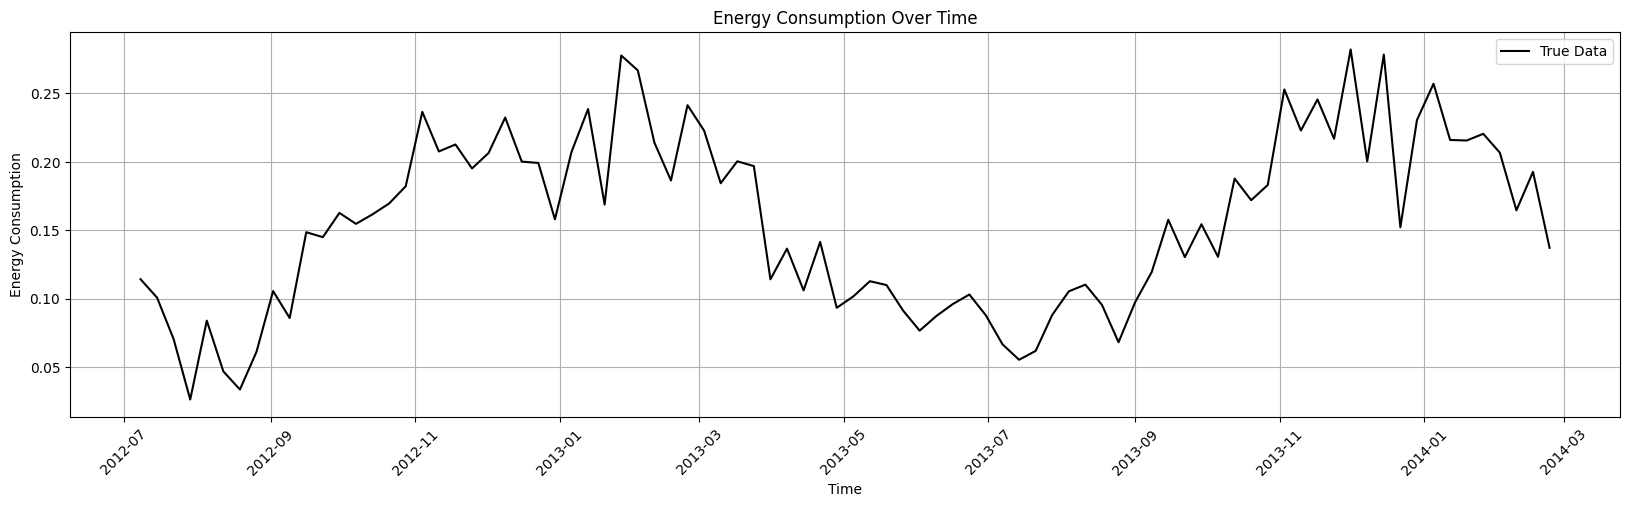

In [15]:
weekly_df = expanded_df.set_index('timestamp').groupby('LCLid').resample('W')['energy_consumption'].mean().round(4).reset_index()
plot_time_series(weekly_df)

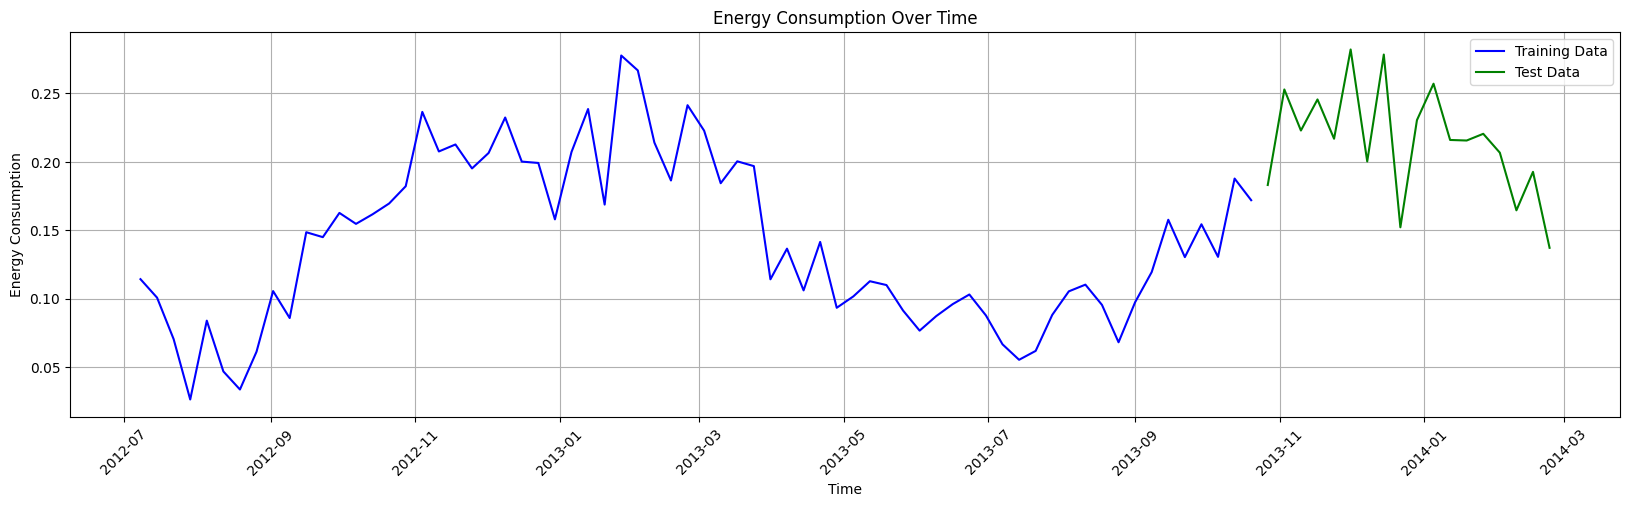

In [16]:
training_data = weekly_df[:int(len(weekly_df)*0.8)]
test_data = weekly_df[int(len(weekly_df)*0.8):]

def plot_training_test_data(training_data, test_data):
    plt.figure(figsize=(20,5))
    plt.plot(training_data['timestamp'], training_data['energy_consumption'], label='Training Data', color='blue')
    plt.plot(test_data['timestamp'], test_data['energy_consumption'], label='Test Data', color='green')

    plt.title('Energy Consumption Over Time')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

plot_training_test_data(training_data, test_data)

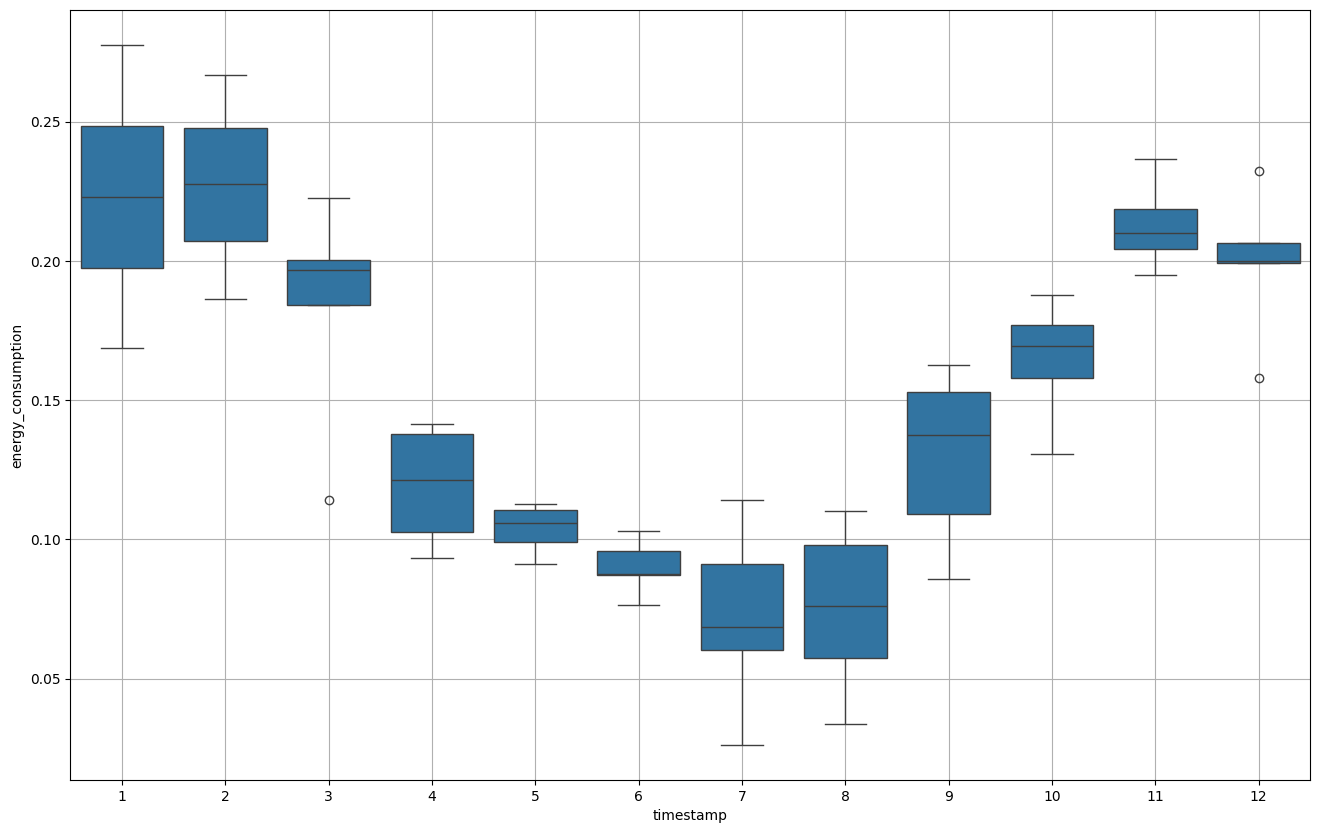

In [17]:
sns.boxplot(x=training_data.set_index('timestamp').index.month, y=training_data.energy_consumption)
plt.grid()

months 1,2,8,9 have inconsistency in the data along the years, they will be the most difficult to predict in any future modeling. Generally the consumption is highest in winter.

# **Checking Stationarity**

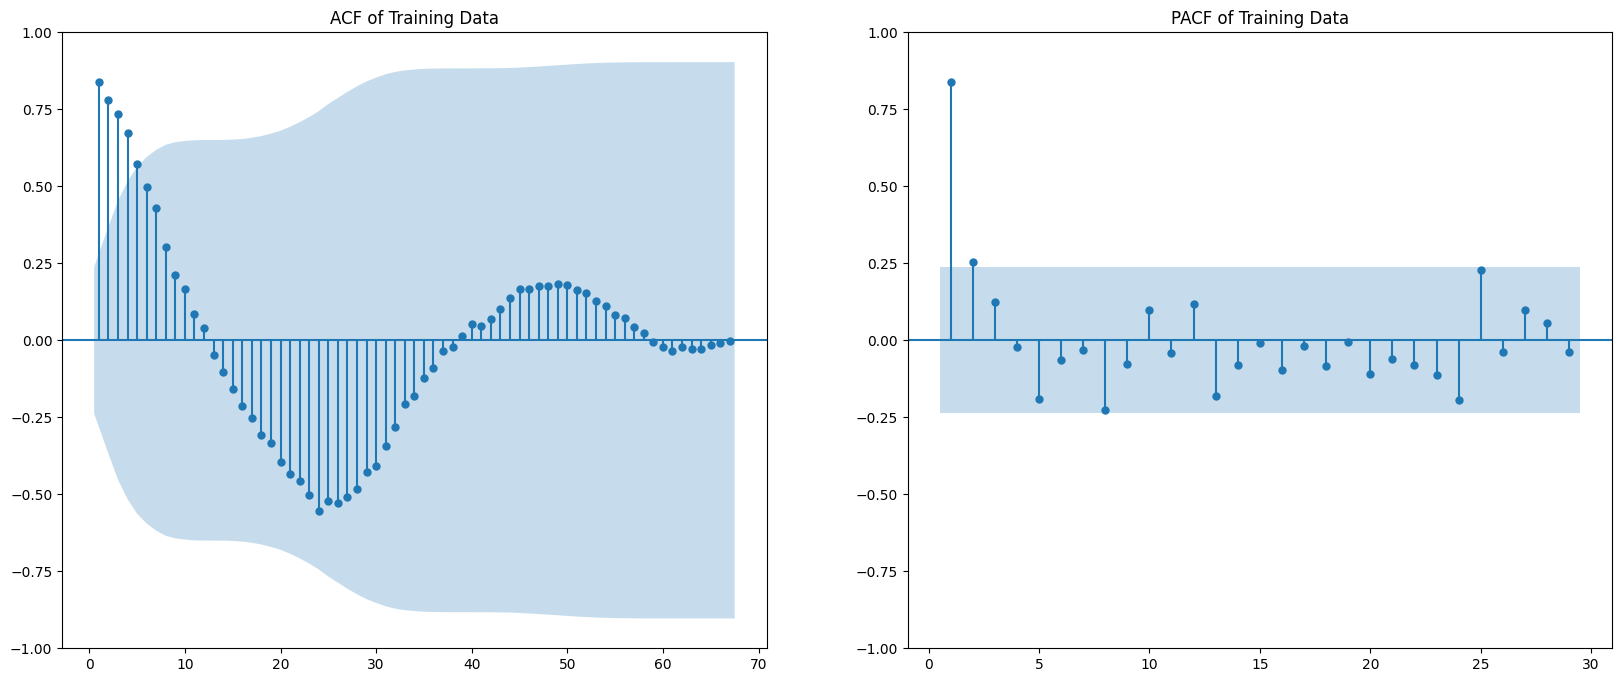

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig = plot_acf(training_data['energy_consumption'], lags=range(1,68), title='ACF of Training Data',ax=ax[0])
fig = plot_pacf(training_data['energy_consumption'], lags=range(1, 30), title='PACF of Training Data', ax =ax[1])

ACF: Alternating positive and negative, decaying to zero --> AutoRegressive model.Use the partial autocorrelation plot to help identify the order.

A significant spike in PACF at lag 1 indicates that the data is autocorrelated.
We can already deduce from the sequence plot before even plotting the ACF that the data is autocorrelated. And in this case we might see that a differencing 1 will be the solution to that.
Now we became somewhat sure that diff by 1 will be good in our case.

In [19]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(training_data['energy_consumption'])
print(pvalue)

0.0868354004752655


pvalue > 0.05 means we reject the null hypothesis that the data is stationary. We will apply differencing by 1 and check again

# **Differencing**

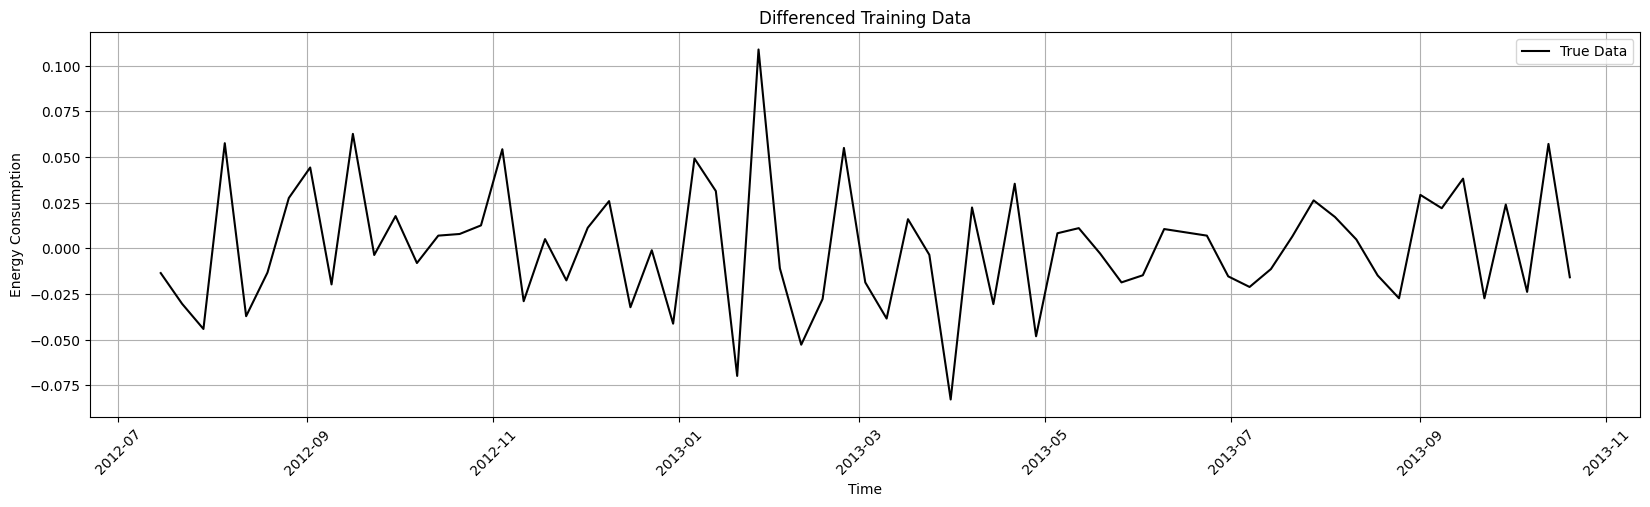

In [20]:
training_series_diff = training_data.copy()
training_series_diff['energy_consumption'] = training_series_diff['energy_consumption'].diff().dropna()
training_series_diff.drop('LCLid', axis=1, inplace=True)
training_series_diff = training_series_diff.dropna()
plot_time_series(training_series_diff, title='Differenced Training Data')

In [21]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(training_series_diff['energy_consumption'])
print(pvalue)

1.463196581434427e-11


adf test is less than 0.05 means the data is stationary after differencing. let's check the kpss

In [22]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, n_lags, critical_values = kpss(training_data['energy_consumption'])
print(p_value)

0.1


<ipython-input-22-1797002a577f>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, n_lags, critical_values = kpss(training_data['energy_consumption'])


Kpss says that the data is indeed stationary after differencing.

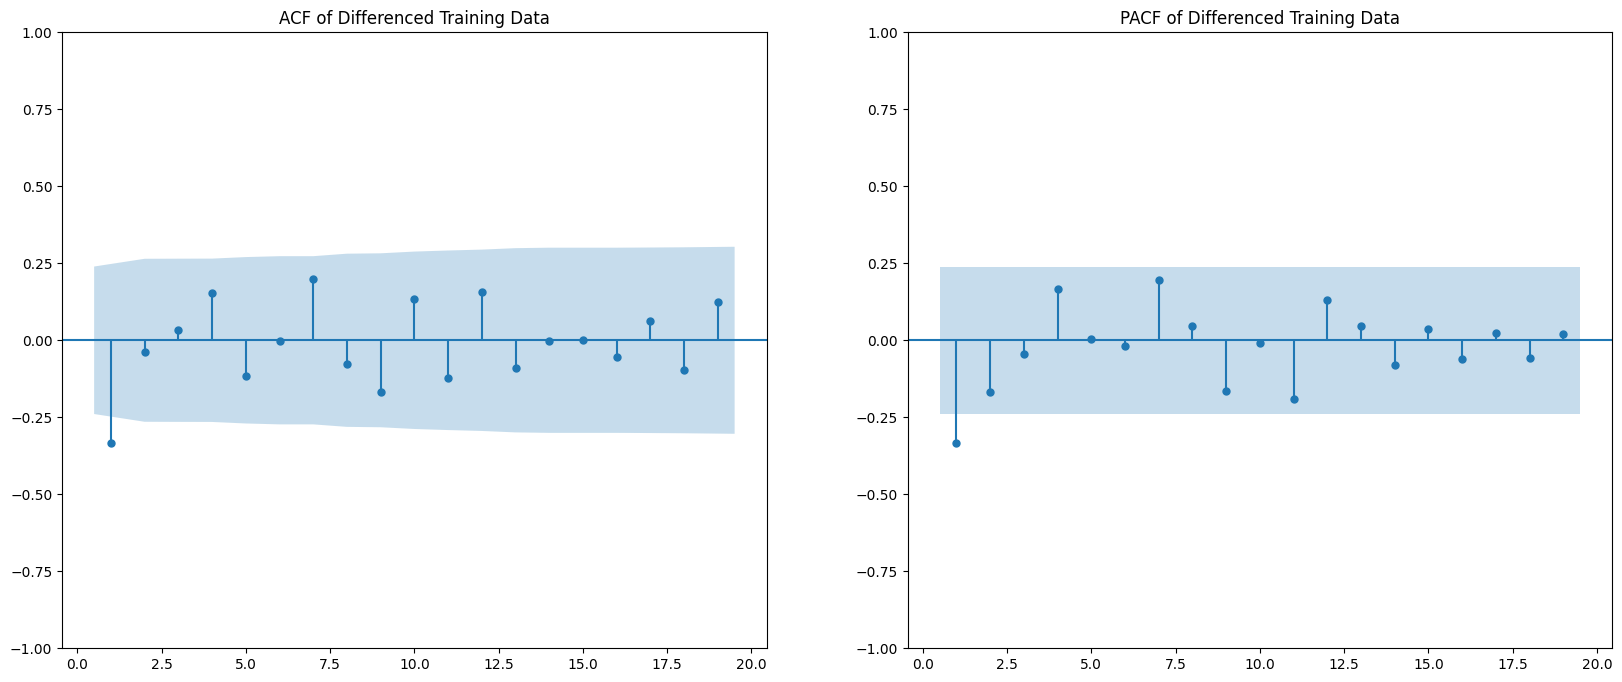

In [23]:
fig ,ax = plt.subplots(1, 2, figsize=(20, 8))
fig1 = plot_acf(training_series_diff['energy_consumption'], lags=range(1, 20), title='ACF of Differenced Training Data', ax=ax[0])
fig2 = plot_pacf(training_series_diff['energy_consumption'], lags=range(1, 20), title='PACF of Differenced Training Data', ax =ax[1])

The plots for acf, pacf and the differenced data indicate that differencing by 1 is the right call. The slight spike in the first point is insignificant

# **Model Development**

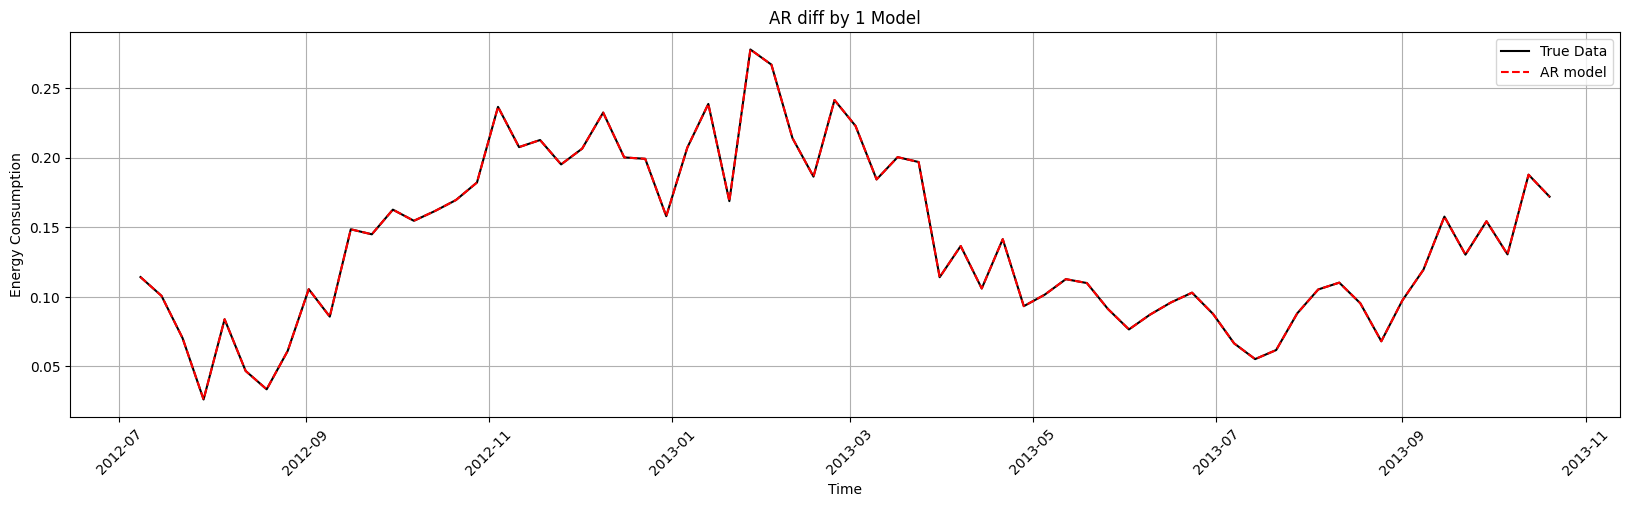

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 132.093
Date:                Tue, 22 Apr 2025   AIC                           -262.187
Time:                        19:58:37   BIC                           -259.982
Sample:                             0   HQIC                          -261.314
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011      0.000      6.651      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   7.75   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.01   Pr

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


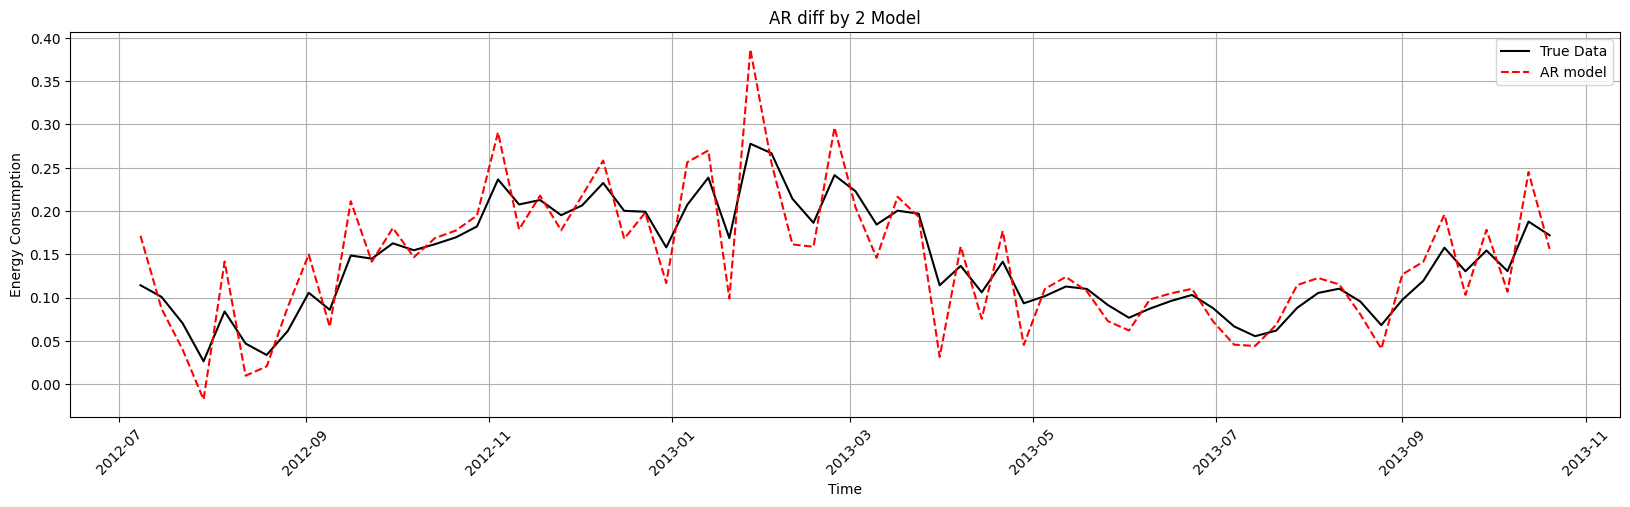

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  97.374
Date:                Tue, 22 Apr 2025   AIC                           -192.748
Time:                        19:58:37   BIC                           -190.558
Sample:                             0   HQIC                          -191.882
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0031      0.000      6.467      0.000       0.002       0.004
Ljung-Box (L1) (Q):                  25.48   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.00   Pr

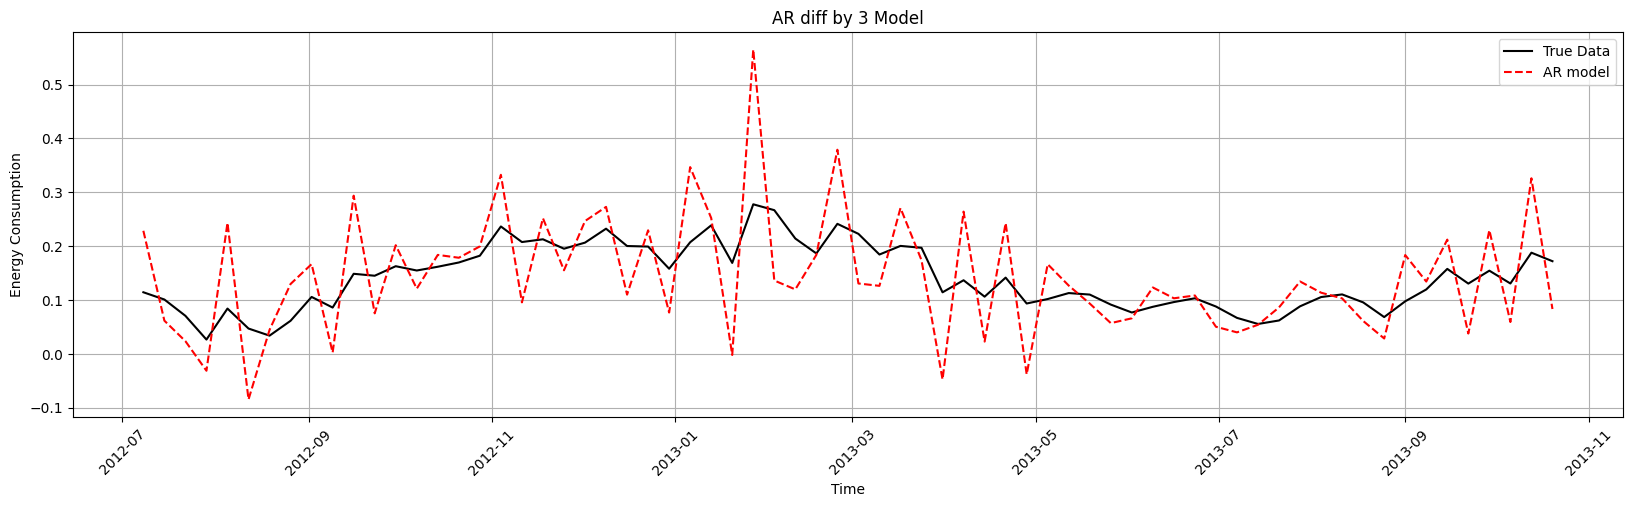

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(0, 3, 0)   Log Likelihood                  57.731
Date:                Tue, 22 Apr 2025   AIC                           -113.462
Time:                        19:58:37   BIC                           -111.287
Sample:                             0   HQIC                          -112.604
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0099      0.002      6.477      0.000       0.007       0.013
Ljung-Box (L1) (Q):                  33.49   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.00   Pr

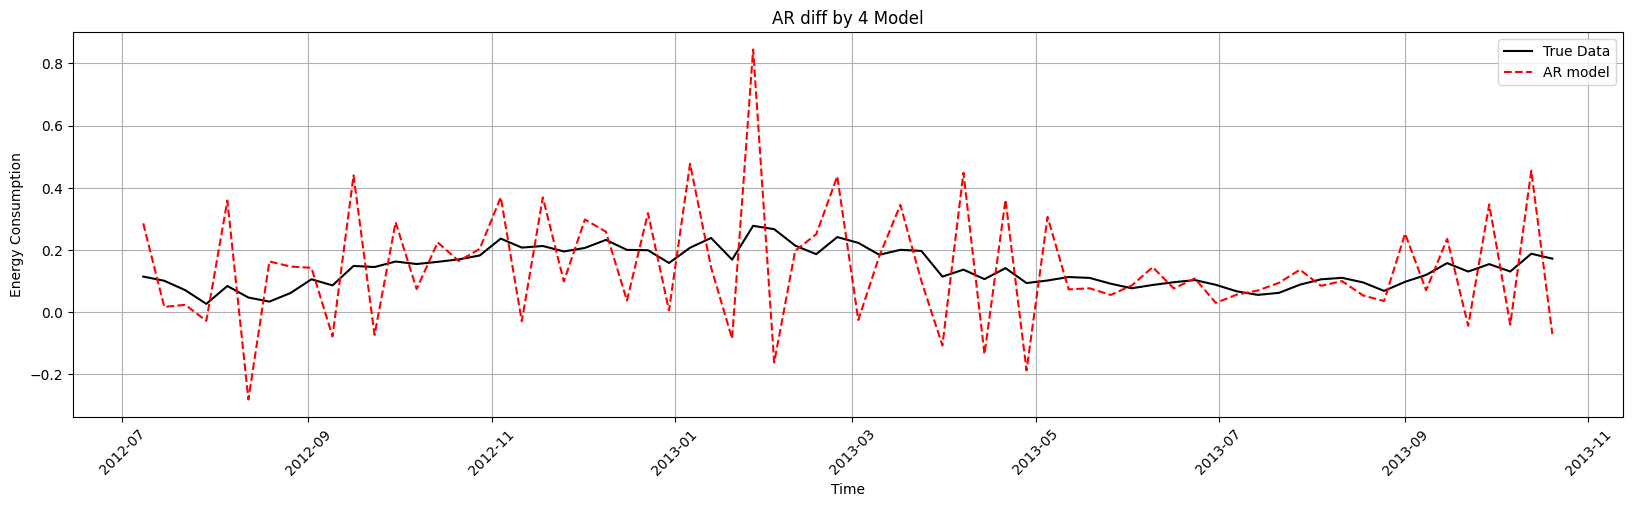

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(0, 4, 0)   Log Likelihood                  17.504
Date:                Tue, 22 Apr 2025   AIC                            -33.008
Time:                        19:58:37   BIC                            -30.849
Sample:                             0   HQIC                           -32.157
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0339      0.005      6.180      0.000       0.023       0.045
Ljung-Box (L1) (Q):                  38.96   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.00   Pr

In [24]:
from statsmodels.tsa.arima.model import ARIMA
for i in range(1,5):
    model = ARIMA(training_data.energy_consumption, order=(0, i, 0)).fit()
    plot_time_series(training_data, title=f'AR diff by {i} Model')
    plt.plot(training_data['timestamp'], model.predict(start=1, end=len(training_data)), color='red', linestyle='dashed', label='AR model')
    plt.legend()
    plt.show()
    print(model.summary())

As seen from the plots, AR with differencing 1 is the best model.

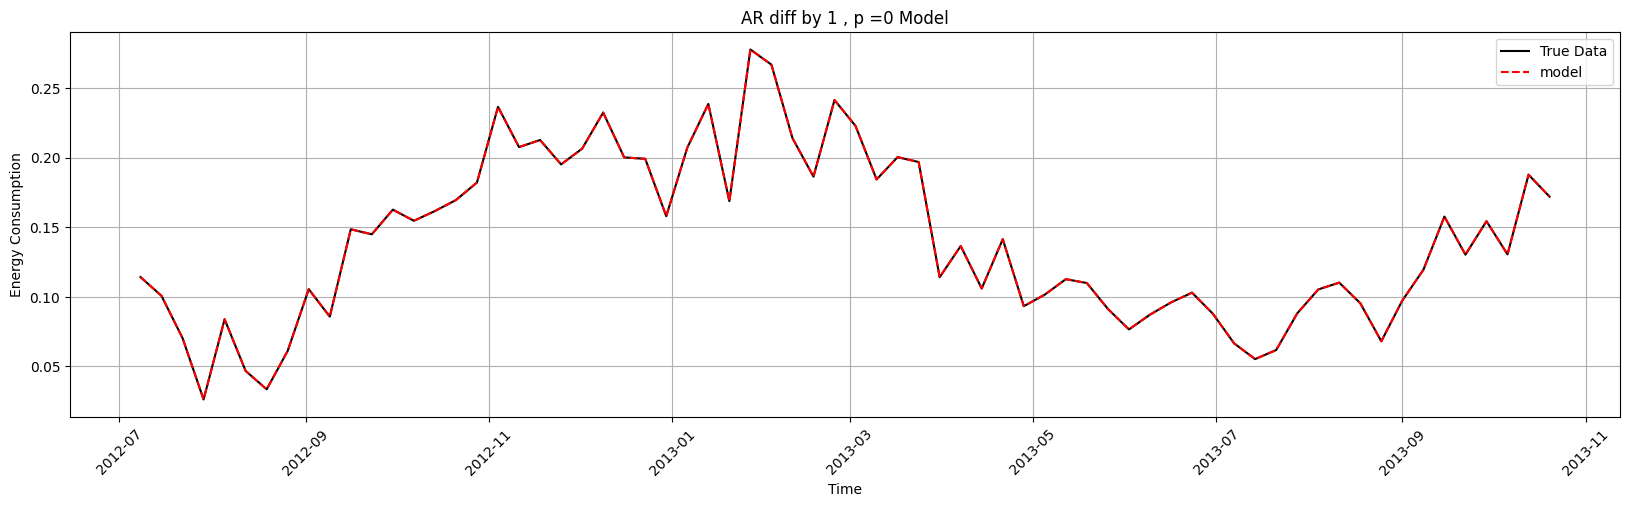

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 132.093
Date:                Tue, 22 Apr 2025   AIC                           -262.187
Time:                        19:58:38   BIC                           -259.982
Sample:                             0   HQIC                          -261.314
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011      0.000      6.651      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   7.75   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.01   Pr

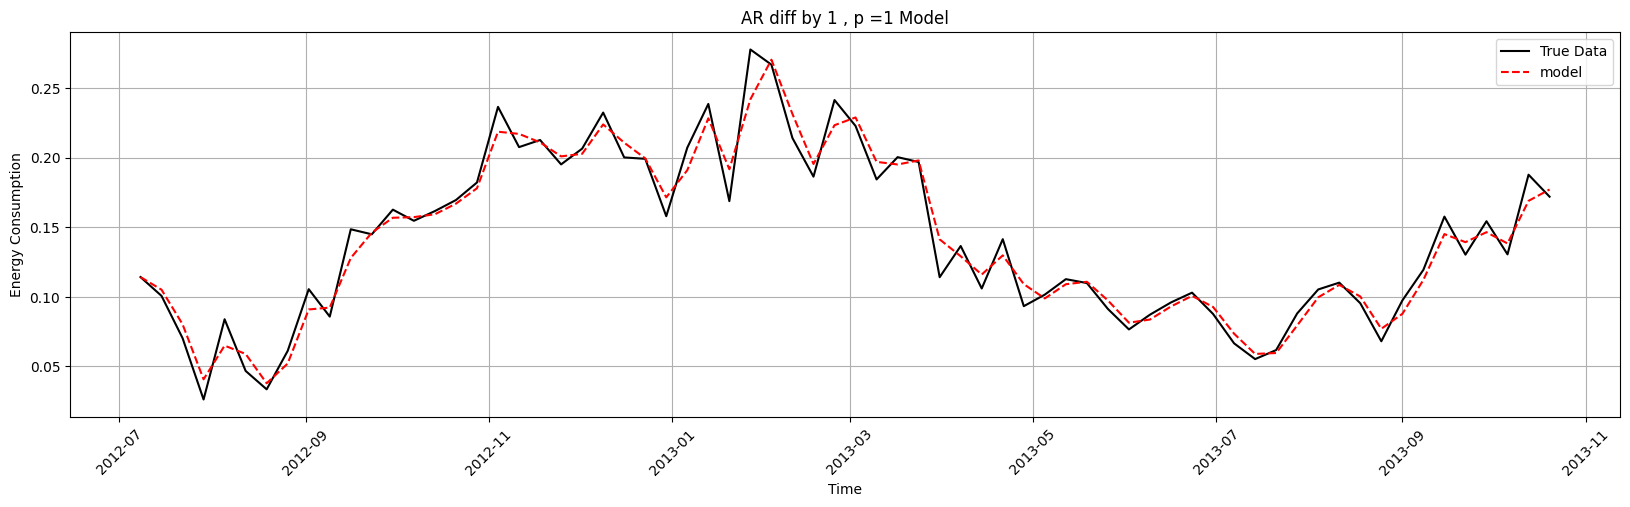

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 135.959
Date:                Tue, 22 Apr 2025   AIC                           -267.918
Time:                        19:58:38   BIC                           -263.509
Sample:                             0   HQIC                          -266.173
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3285      0.114     -2.876      0.004      -0.552      -0.105
sigma2         0.0010      0.000      5.654      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.24   Jarque-

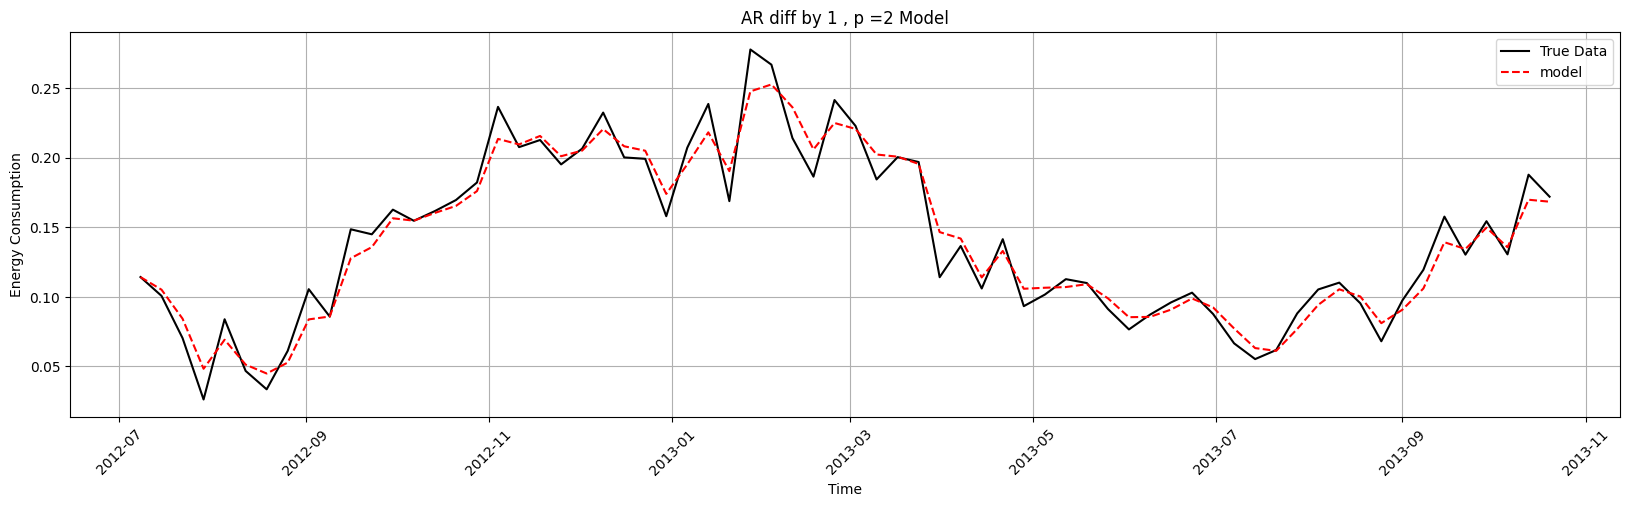

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 136.893
Date:                Tue, 22 Apr 2025   AIC                           -267.787
Time:                        19:58:38   BIC                           -261.173
Sample:                             0   HQIC                          -265.170
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3845      0.119     -3.222      0.001      -0.618      -0.151
ar.L2         -0.1689      0.117     -1.443      0.149      -0.398       0.061
sigma2         0.0010      0.000      5.720      0.0

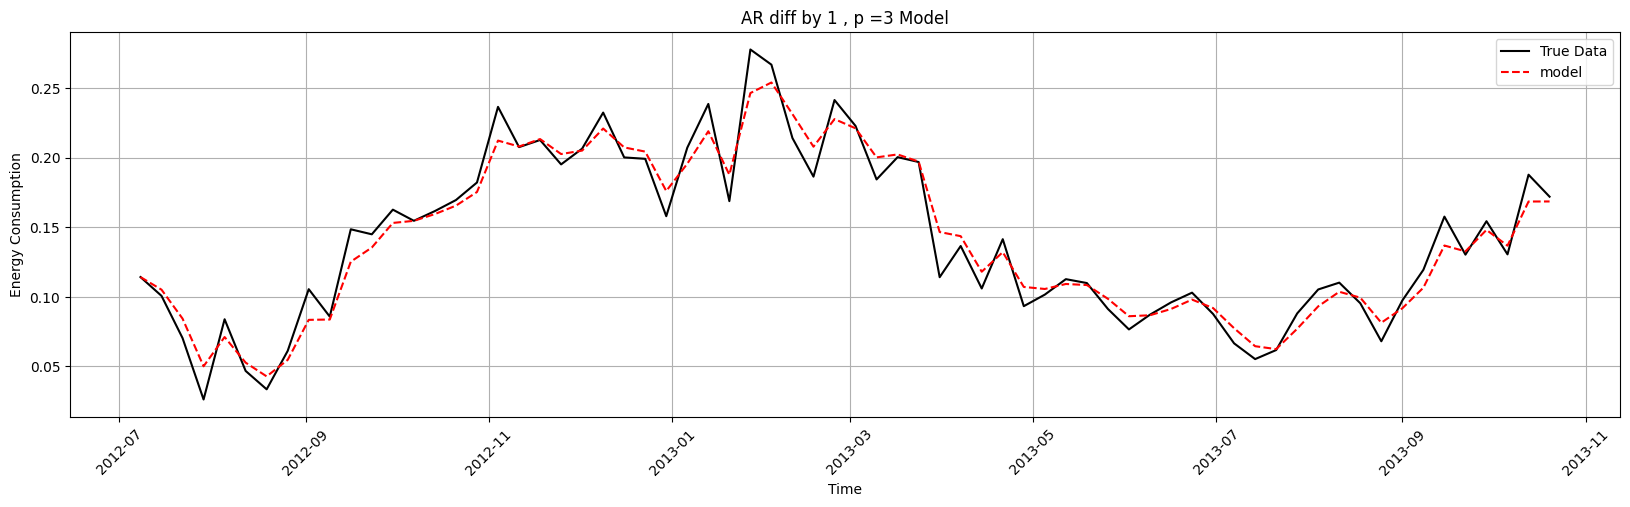

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 136.977
Date:                Tue, 22 Apr 2025   AIC                           -265.953
Time:                        19:58:39   BIC                           -257.134
Sample:                             0   HQIC                          -262.463
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3942      0.141     -2.788      0.005      -0.671      -0.117
ar.L2         -0.1901      0.131     -1.447      0.148      -0.448       0.067
ar.L3         -0.0517      0.136     -0.381      0.7

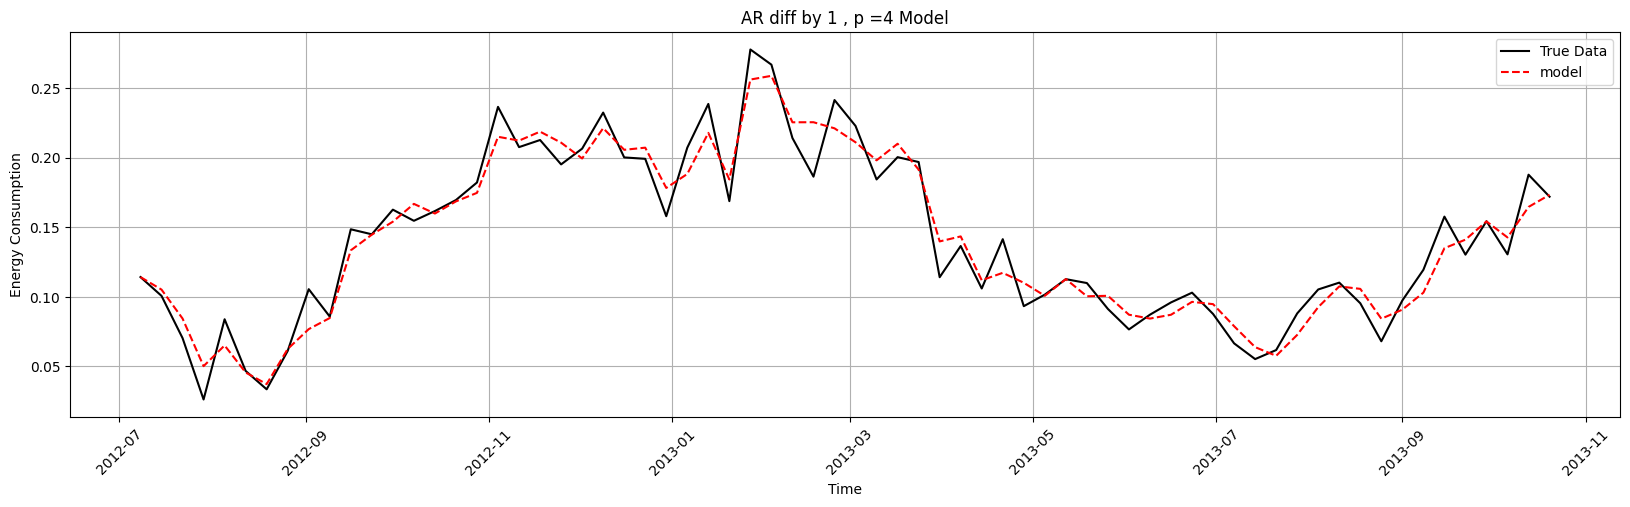

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 138.081
Date:                Tue, 22 Apr 2025   AIC                           -266.163
Time:                        19:58:39   BIC                           -255.139
Sample:                             0   HQIC                          -261.801
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3876      0.144     -2.697      0.007      -0.669      -0.106
ar.L2         -0.1527      0.135     -1.135      0.256      -0.416       0.111
ar.L3          0.0220      0.154      0.143      0.8

In [25]:
for j in range(0,5):
    model = ARIMA(training_data.energy_consumption, order=(j, 1, 0)).fit()
    plot_time_series(training_data, title=f'AR diff by 1 , p ={j} Model')
    plt.plot(training_data['timestamp'], model.predict(start=1, end=len(training_data)), color='red', linestyle='dashed', label='model')
    plt.legend()
    plt.show()
    print(model.summary())

Let's check the best visually fitting model again

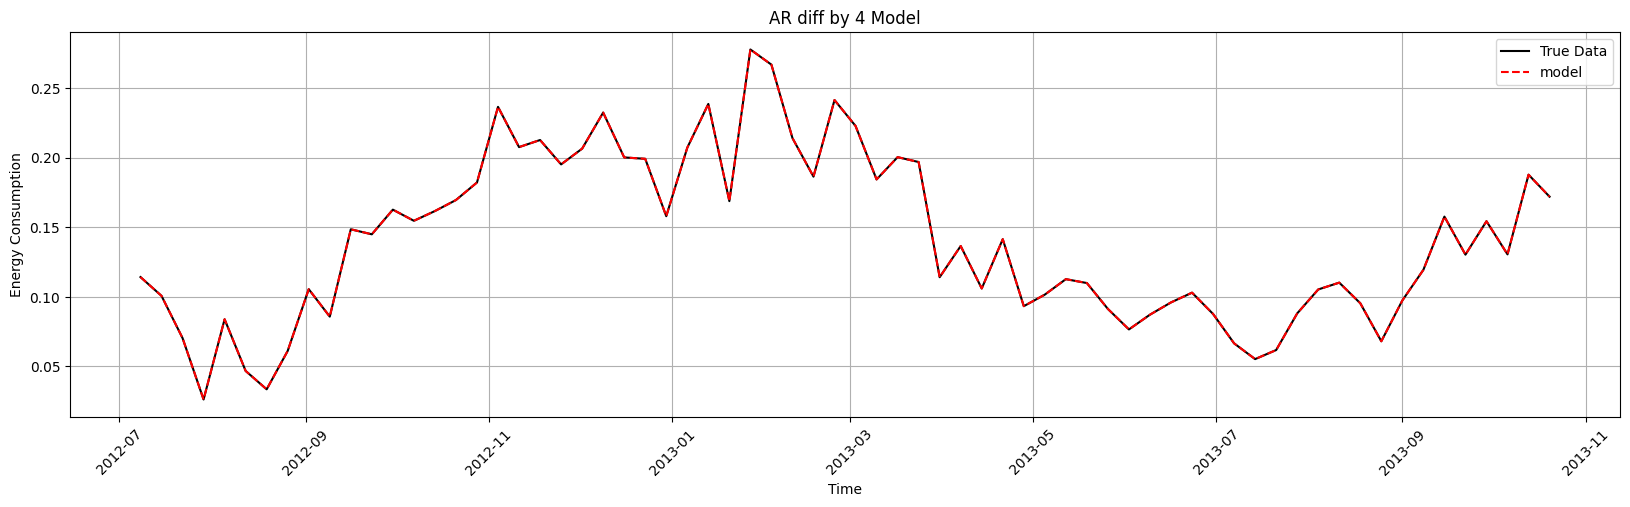

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 132.093
Date:                Tue, 22 Apr 2025   AIC                           -262.187
Time:                        19:58:40   BIC                           -259.982
Sample:                             0   HQIC                          -261.314
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011      0.000      6.651      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   7.75   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.01   Pr

In [26]:
model = ARIMA(training_data.energy_consumption, order=(0, 1, 0)).fit()
plot_time_series(training_data, title=f'AR diff by {j} Model')
plt.plot(training_data['timestamp'], model.predict(start=1, end=len(training_data)), color='red', linestyle='dashed', label='model')
plt.legend()
plt.show()
print(model.summary())

Ljung-box Low p-value <0.05  suggests residuals are autocorrelated (alternate hypothesis) → not ideal! A good model should have white noise residuals.
That is even after differencing by 1, the model here has p=0 and d =1

Jarque-Bera p-value >0.05 suggests that residuals are normally distributed so no problem here.

Let's try more models

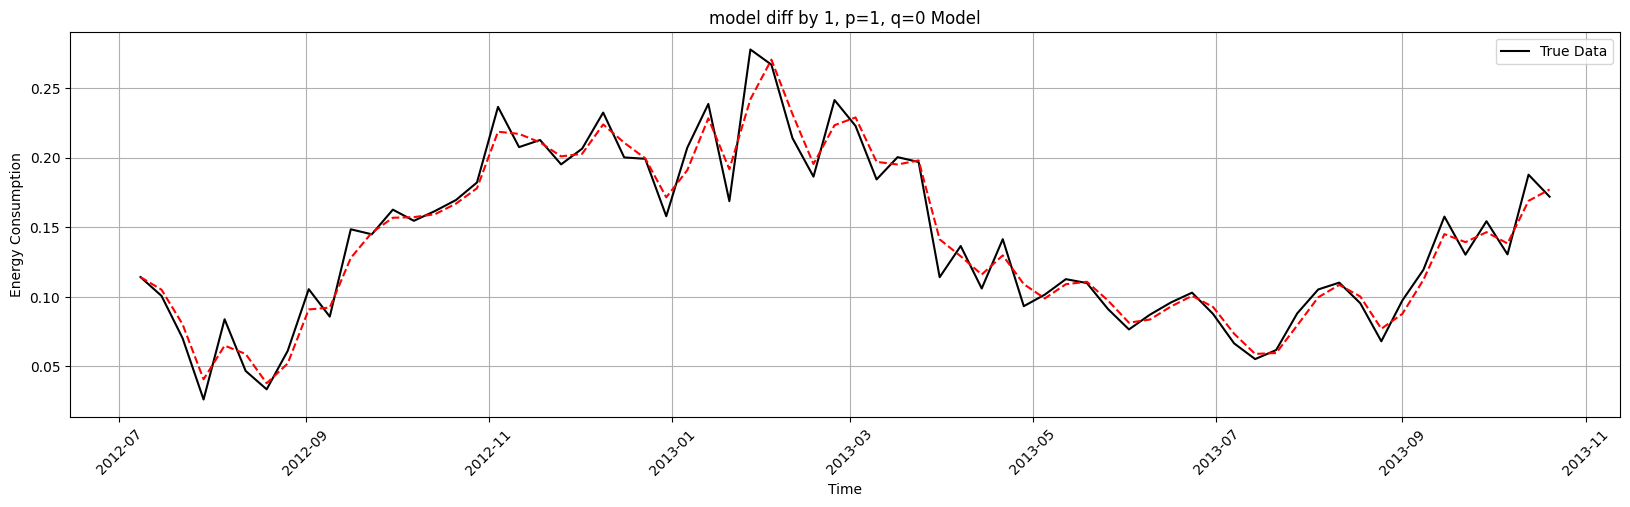

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 135.959
Date:                Tue, 22 Apr 2025   AIC                           -267.918
Time:                        19:58:40   BIC                           -263.509
Sample:                             0   HQIC                          -266.173
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3285      0.114     -2.876      0.004      -0.552      -0.105
sigma2         0.0010      0.000      5.654      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.24   Jarque-

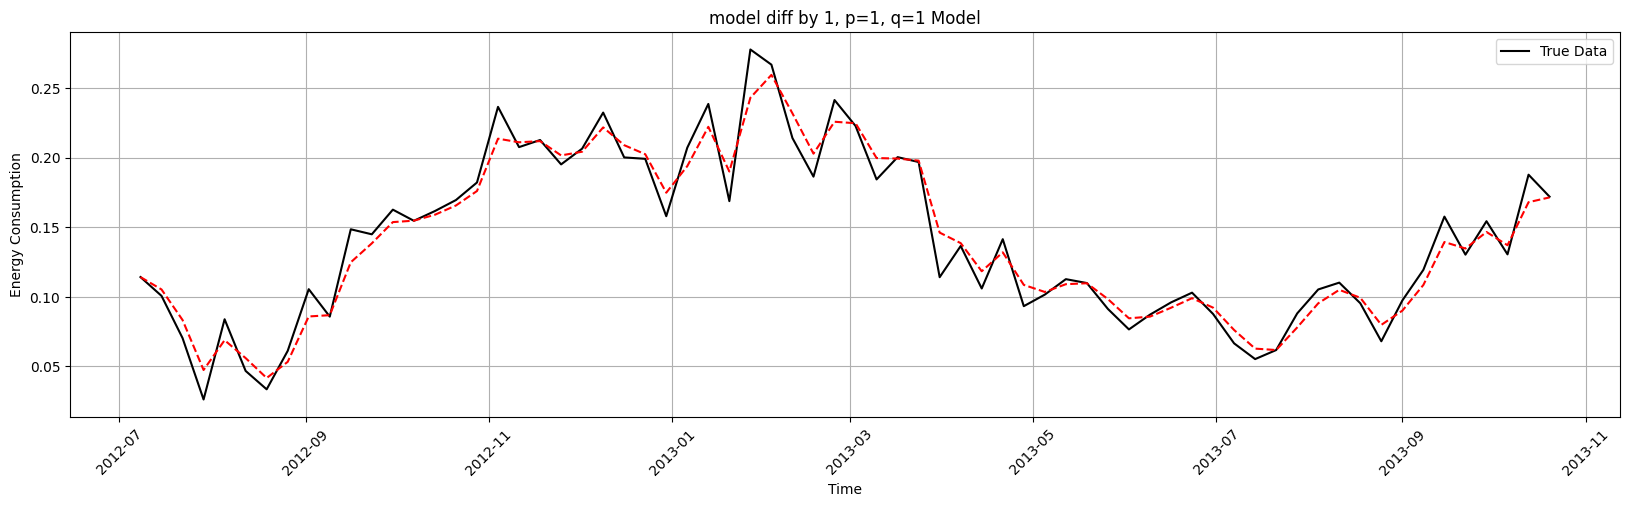

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 136.698
Date:                Tue, 22 Apr 2025   AIC                           -267.396
Time:                        19:58:40   BIC                           -260.782
Sample:                             0   HQIC                          -264.778
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0507      0.305     -0.166      0.868      -0.648       0.546
ma.L1         -0.3324      0.308     -1.080      0.280      -0.935       0.271
sigma2         0.0010      0.000      5.638      0.0

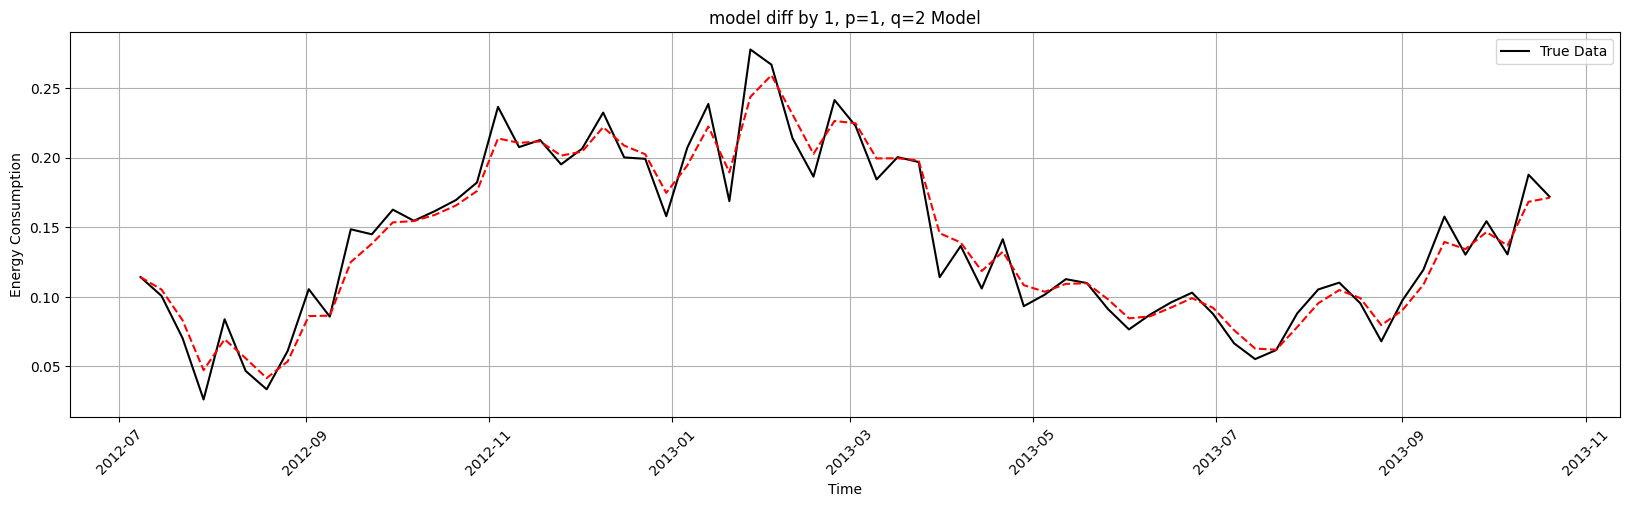

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 136.682
Date:                Tue, 22 Apr 2025   AIC                           -265.365
Time:                        19:58:41   BIC                           -256.546
Sample:                             0   HQIC                          -261.875
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1840     11.684     -0.016      0.987     -23.085      22.717
ma.L1         -0.1935     11.640     -0.017      0.987     -23.008      22.621
ma.L2         -0.0579      4.400     -0.013      0.9

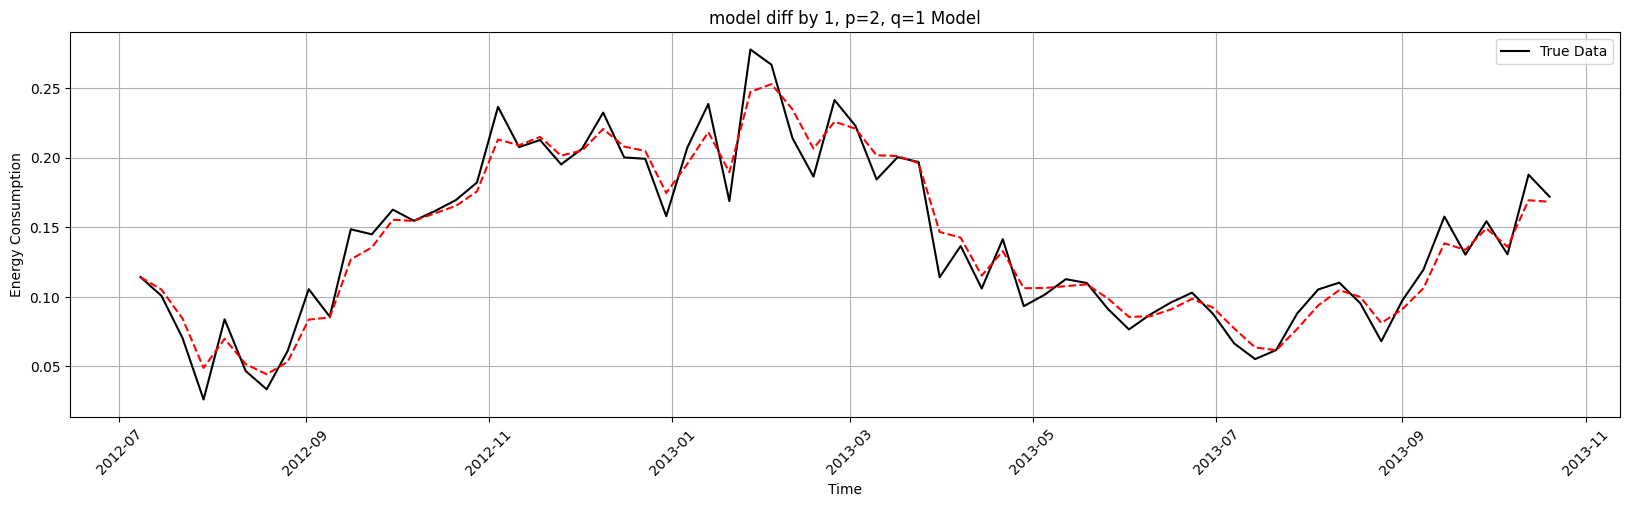

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 136.919
Date:                Tue, 22 Apr 2025   AIC                           -265.839
Time:                        19:58:41   BIC                           -257.020
Sample:                             0   HQIC                          -262.349
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2932      0.718     -0.408      0.683      -1.700       1.114
ar.L2         -0.1405      0.277     -0.508      0.612      -0.683       0.402
ma.L1         -0.0948      0.779     -0.122      0.9

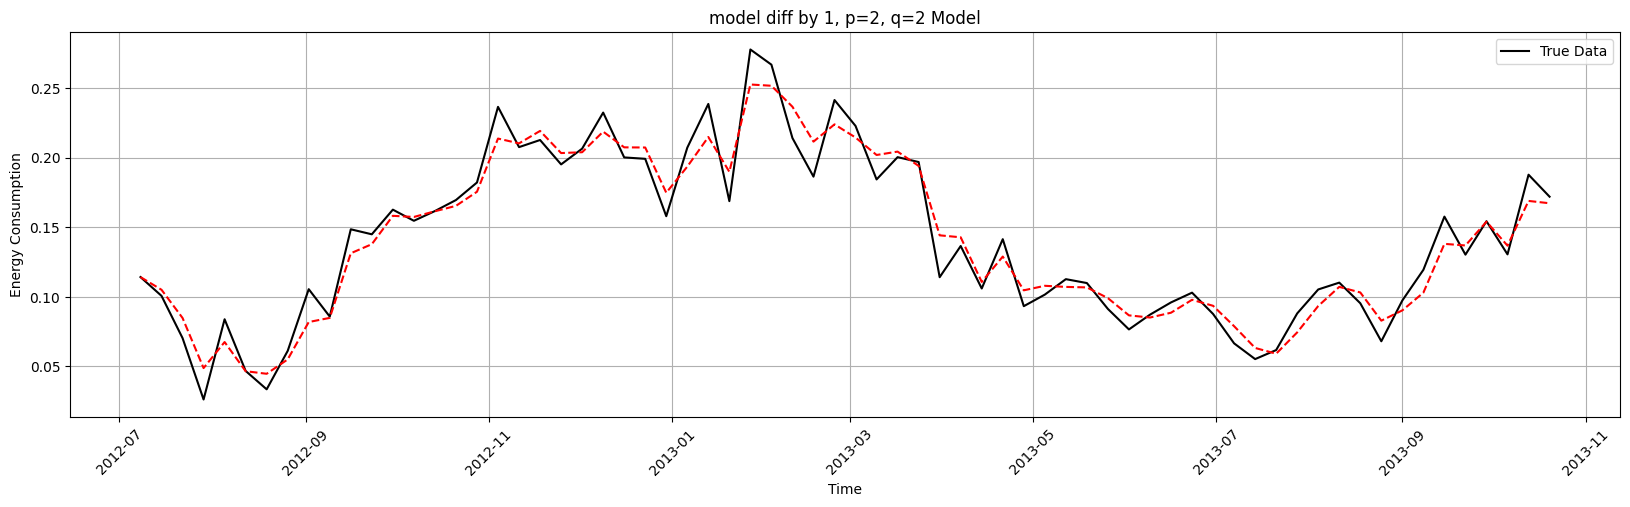

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 137.262
Date:                Tue, 22 Apr 2025   AIC                           -264.524
Time:                        19:58:41   BIC                           -253.500
Sample:                             0   HQIC                          -260.162
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0318      0.873     -0.036      0.971      -1.743       1.680
ar.L2         -0.3205      0.350     -0.916      0.360      -1.006       0.365
ma.L1         -0.3553      0.885     -0.401      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


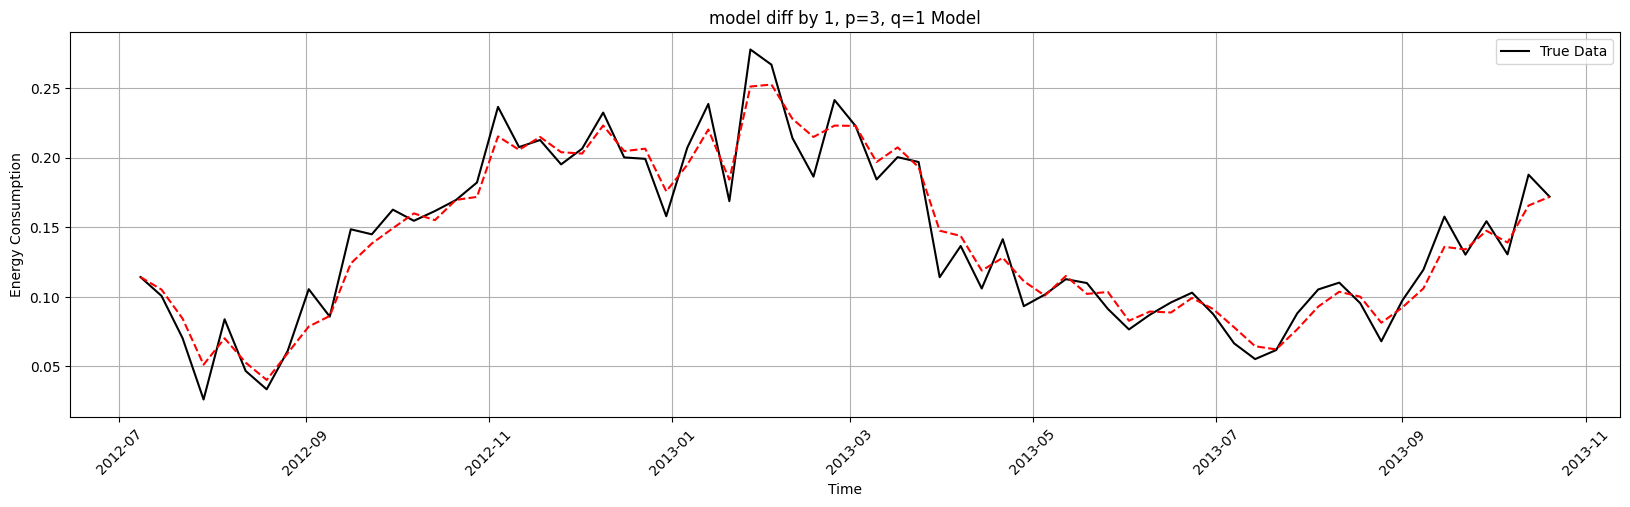

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 137.353
Date:                Tue, 22 Apr 2025   AIC                           -264.705
Time:                        19:58:42   BIC                           -253.682
Sample:                             0   HQIC                          -260.343
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1462      0.459     -2.495      0.013      -2.047      -0.246
ar.L2         -0.4895      0.219     -2.235      0.025      -0.919      -0.060
ar.L3         -0.2103      0.127     -1.654      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


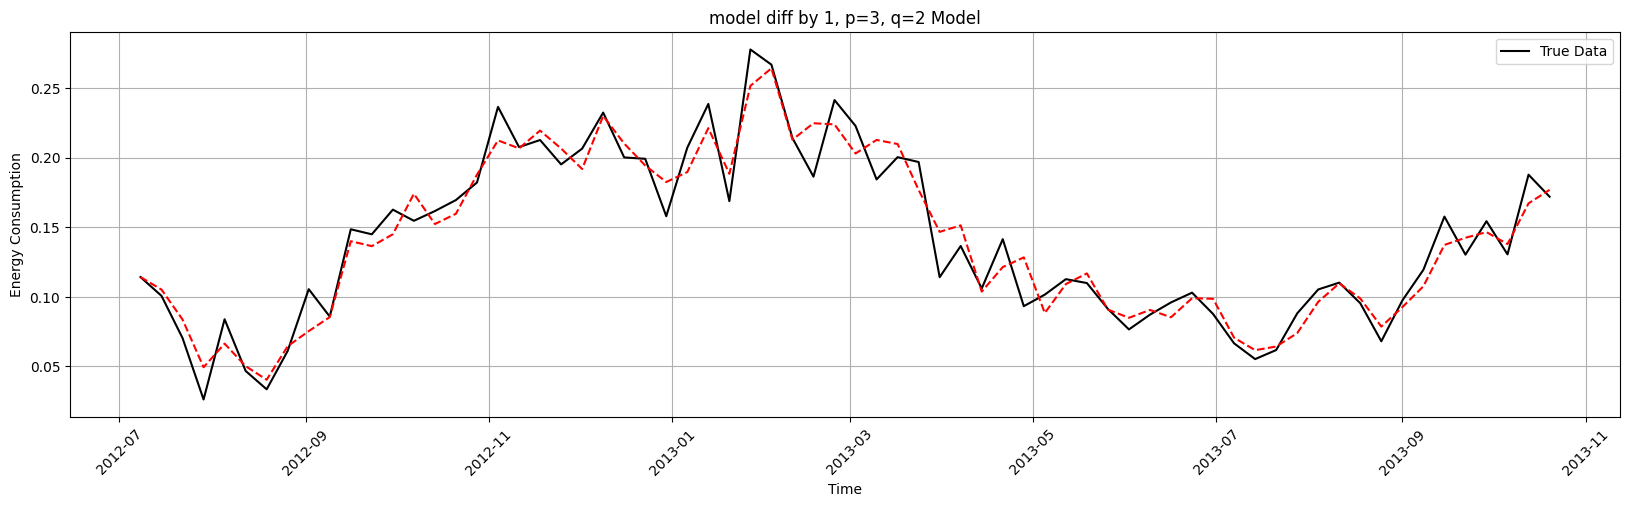

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 139.402
Date:                Tue, 22 Apr 2025   AIC                           -266.803
Time:                        19:58:44   BIC                           -253.575
Sample:                             0   HQIC                          -261.569
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2162      0.167     -7.274      0.000      -1.544      -0.889
ar.L2         -1.2219      0.150     -8.165      0.000      -1.515      -0.929
ar.L3         -0.4350      0.131     -3.331      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


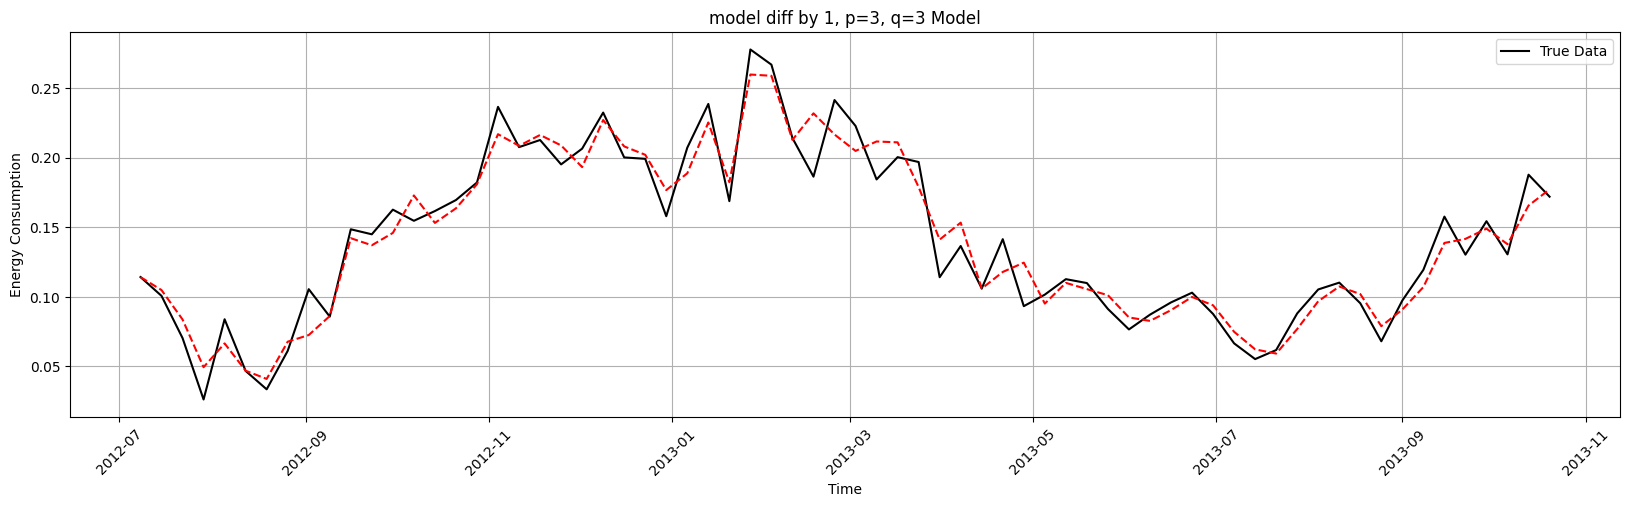

                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   68
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 138.686
Date:                Tue, 22 Apr 2025   AIC                           -263.372
Time:                        19:58:45   BIC                           -247.939
Sample:                             0   HQIC                          -257.265
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2262      0.333     -3.677      0.000      -1.880      -0.573
ar.L2         -1.1656      0.272     -4.291      0.000      -1.698      -0.633
ar.L3         -0.5285      0.282     -1.872      0.0

In [27]:
# Define the ARIMA orders to loop through
orders = [(1, 1, 0), (1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2),(3,1,1),(3,1,2),(3,1,3)]

# Loop through the orders
for (p, d, q) in orders:
    # Fit the ARIMA model
    model = ARIMA(training_data.energy_consumption, order=(p, d, q)).fit()

    # Plot the time series and predictions
    plot_time_series(training_data, title=f'model diff by 1, p={p}, q={q} Model')
    plt.plot(training_data['timestamp'], model.predict(start=1, end=len(training_data)),
             color='red', linestyle='dashed')
    plt.legend()
    plt.show()

    # Print the model summary
    print(model.summary())

Out of all the models we tried,

Arima(1,1,1) which is a mixed model of AR p=1 and MA q=1 is the best model. why? because the probabilities are the highest for both. The research results I did indicate that:

Interpreting the P-Values

Ljung-Box P-Value:

If > 0.05, it suggests residuals are likely independent (white noise), indicating the model captured the data's autocorrelation well.

If < 0.05, it indicates significant autocorrelation, suggesting the model might need tweaks, like adding more AR or MA terms.

Jarque-Bera P-Value:

If > 0.05, it suggests residuals are normally distributed, which is good for inference tasks.

If < 0.05, residuals are not normally distributed, which might affect confidence intervals but is less critical for forecasting, especially with large datasets.

# **Forecasting**

Prompt: We have training data and test data.
Generate Forecasts: Use the finalized ARIMA model to predict future values.
Confidence Intervals: Calculate prediction intervals to quantify uncertainty.
Validate Forecasts: Compare forecasts with actual data (if available) to assess accuracy.

In [28]:
train = training_data.set_index('timestamp')
test = test_data.set_index('timestamp')
train = train.drop(columns=['LCLid'])
test = test.drop(columns=['LCLid'])
train = train.dropna()
test = test.dropna()
test_values = test.values
test_values.reshape(-1)

array([0.183 , 0.2528, 0.2228, 0.2455, 0.2168, 0.282 , 0.2002, 0.2783,
       0.1521, 0.2304, 0.257 , 0.2159, 0.2155, 0.2204, 0.2066, 0.1645,
       0.1926, 0.1371])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)



--- Forecast vs Actual ---
            Actual  Forecast
timestamp                   
2013-10-27  0.1830  0.171393
2013-11-03  0.2528  0.171418
2013-11-10  0.2228  0.171417
2013-11-17  0.2455  0.171417
2013-11-24  0.2168  0.171417
2013-12-01  0.2820  0.171417
2013-12-08  0.2002  0.171417
2013-12-15  0.2783  0.171417
2013-12-22  0.1521  0.171417
2013-12-29  0.2304  0.171417
2014-01-05  0.2570  0.171417
2014-01-12  0.2159  0.171417
2014-01-19  0.2155  0.171417
2014-01-26  0.2204  0.171417
2014-02-02  0.2066  0.171417
2014-02-09  0.1645  0.171417
2014-02-16  0.1926  0.171417
2014-02-23  0.1371  0.171417


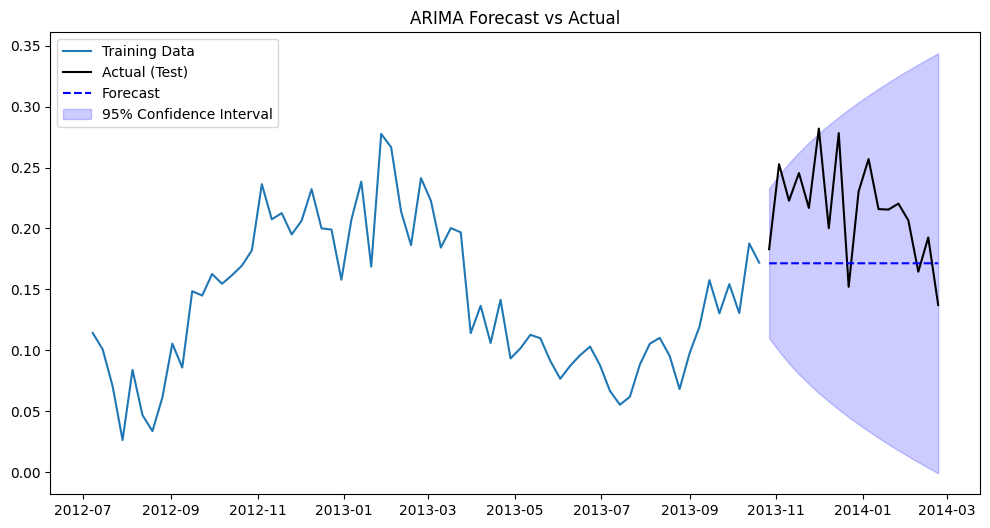


--- Accuracy Metrics ---
MAE: 0.050506577796396245
MSE: 0.003435378147040399
RMSE: 0.0586120989816983


In [29]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# --- ARIMA parameters ---
p = 1
d = 1
q = 1  # Use the best order from previous analysis

# --- Fit model ---
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# --- Forecast ---
n_test = len(test)
forecast_result = model_fit.get_forecast(steps=n_test)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)

# --- Ensure shapes are compatible ---
test_flat = test.squeeze()  # Make sure test is 1D
forecast_flat = forecast.squeeze()  # Make sure forecast is 1D

# --- Create a comparison DataFrame ---
forecast_table = pd.DataFrame({
    'Actual': test_flat,
    'Forecast': forecast_flat
}, index=test.index)

print("\n--- Forecast vs Actual ---")
print(forecast_table)

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual (Test)', color='black')
plt.plot(test.index, forecast, label='Forecast', color='blue', linestyle='--')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label='95% Confidence Interval')

plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

# --- Accuracy metrics ---
print("\n--- Accuracy Metrics ---")
print("MAE:", mae(test_flat, forecast_flat))
print("MSE:", mse(test_flat, forecast_flat))
print("RMSE:", rmse(test_flat, forecast_flat))

In [31]:
!pip install -qU statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.7 MB/s eta 0:00:00


In [32]:
from statsforecast.models import AutoARIMA
from statsforecast.core import StatsForecast

In [44]:
st = StatsForecast( models=[AutoARIMA(season_length=12)],
                   freq='W',
                   n_jobs=1)

In [45]:

ts_df = train.reset_index()
ts_df['unique_id'] = 'person'

In [46]:
forecast_df = st.forecast(df=ts_df, h=len(ts_df), time_col='timestamp', target_col='energy_consumption', fitted=True)
forecast_df

,unique_id,timestamp,AutoARIMA
0,person,2013-10-27,0.178198
1,person,2013-11-03,0.183036
2,person,2013-11-10,0.179000
3,person,2013-11-17,0.169352
4,person,2013-11-24,0.179867
...,...,...,...
63,person,2015-01-11,0.203594
64,person,2015-01-18,0.203594
65,person,2015-01-25,0.203594
66,person,2015-02-01,0.203594


<Axes: xlabel='timestamp'>

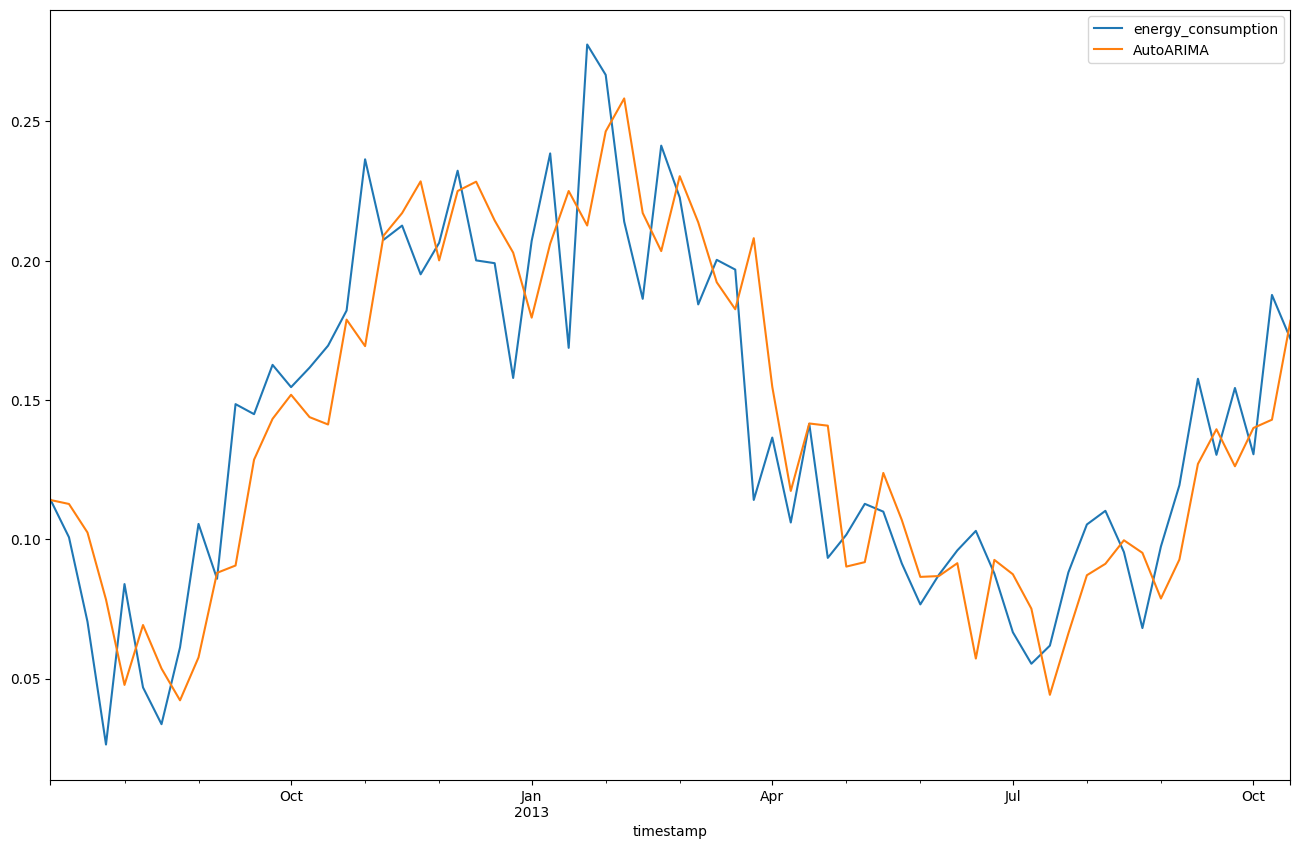

In [47]:
st.forecast_fitted_values().plot(x='timestamp', y=['energy_consumption','AutoARIMA'])